<a href="https://colab.research.google.com/github/RafsanJany-44/Thesis_Project/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/krishnaik06/Feature-Selection-techniques/blob/master/Feature%20Selection.ipynb

https://www.youtube.com/watch?v=EqLBAmtKMnQ

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("/content/EEG_HMC.csv")
X = data.iloc[:,1:76] #independent columns
y = data[['Sleep_Stage']]   #target column i.e price range

In [3]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [4]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [5]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [6]:
featureScores

,Specs,Score
0,MeanP_Alpha_F4,62.731243
1,MedianF_Alpha_F4,625.441584
2,MeanF_Alpha_F4,4186.932107
3,Spectral Edge_Alpha_F4,4760.597022
4,PeakF_Alpha_F4,388.837305
...,...,...
70,MeanP_Gamma_O2,26.248133
71,MedianF_Gamma_O2,539.956987
72,MeanF_Gamma_O2,374.193067
73,Spectral Edge_Gamma_O2,358.426283


In [13]:
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                     Specs         Score
59           PeakF_Beta_O2  13501.822460
9            PeakF_Beta_F4   8003.136934
34           PeakF_Beta_C4   5144.466182
3   Spectral Edge_Alpha_F4   4760.597022
2           MeanF_Alpha_F4   4186.932107
8    Spectral Edge_Beta_F4   3953.173955
74          PeakF_Gamma_O2   3329.282921
6          MedianF_Beta_F4   3081.298755
28  Spectral Edge_Alpha_C4   2979.921329
27          MeanF_Alpha_C4   2616.797850
33   Spectral Edge_Beta_C4   2465.970531
54          PeakF_Alpha_O2   2117.882320
19          PeakF_Delta_F4   2117.125596
24          PeakF_Gamma_F4   1978.892156
49          PeakF_Gamma_C4   1912.328528
42          MeanF_Delta_C4   1866.515375
53  Spectral Edge_Alpha_O2   1784.013962
69          PeakF_Delta_O2   1687.660593
51        MedianF_Alpha_O2   1576.224952
36        MedianF_Theta_C4   1517.937093


In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesClassifier()

In [15]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[3.76076803e-05 1.31683537e-02 2.77304487e-02 2.77475136e-02
 1.30084776e-02 2.44928891e-06 3.15962553e-02 2.04454631e-02
 2.21573357e-02 1.58809869e-02 3.04724638e-04 2.33164574e-02
 1.48677008e-02 1.45151122e-02 1.56790006e-02 1.82563939e-03
 6.02632235e-03 2.22274208e-02 1.90152450e-02 1.05284733e-02
 1.69177281e-05 1.66541698e-02 1.42750581e-02 1.23858721e-02
 9.29596384e-03 5.01052550e-05 1.20760021e-02 2.09804010e-02
 2.02269900e-02 1.21836840e-02 3.65564366e-04 2.18632909e-02
 1.78364748e-02 1.72669038e-02 1.31044266e-02 3.27261484e-04
 2.59242275e-02 1.61757984e-02 1.50233373e-02 1.82883485e-02
 2.18077390e-03 9.45728605e-03 2.72525736e-02 2.34146418e-02
 8.64822299e-03 3.03598492e-04 1.39736542e-02 1.26235638e-02
 1.04130454e-02 9.37327937e-03 3.71049431e-05 1.72317551e-02
 1.52575455e-02 1.54770885e-02 1.34242204e-02 5.20438588e-06
 1.54544625e-02 1.48629291e-02 1.50048957e-02 1.33326504e-02
 3.10224329e-04 2.74766426e-02 1.58025602e-02 2.27763100e-02
 1.96913167e-02 2.324287

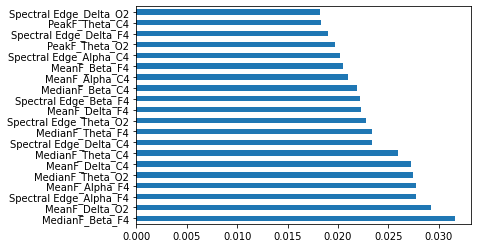

In [16]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

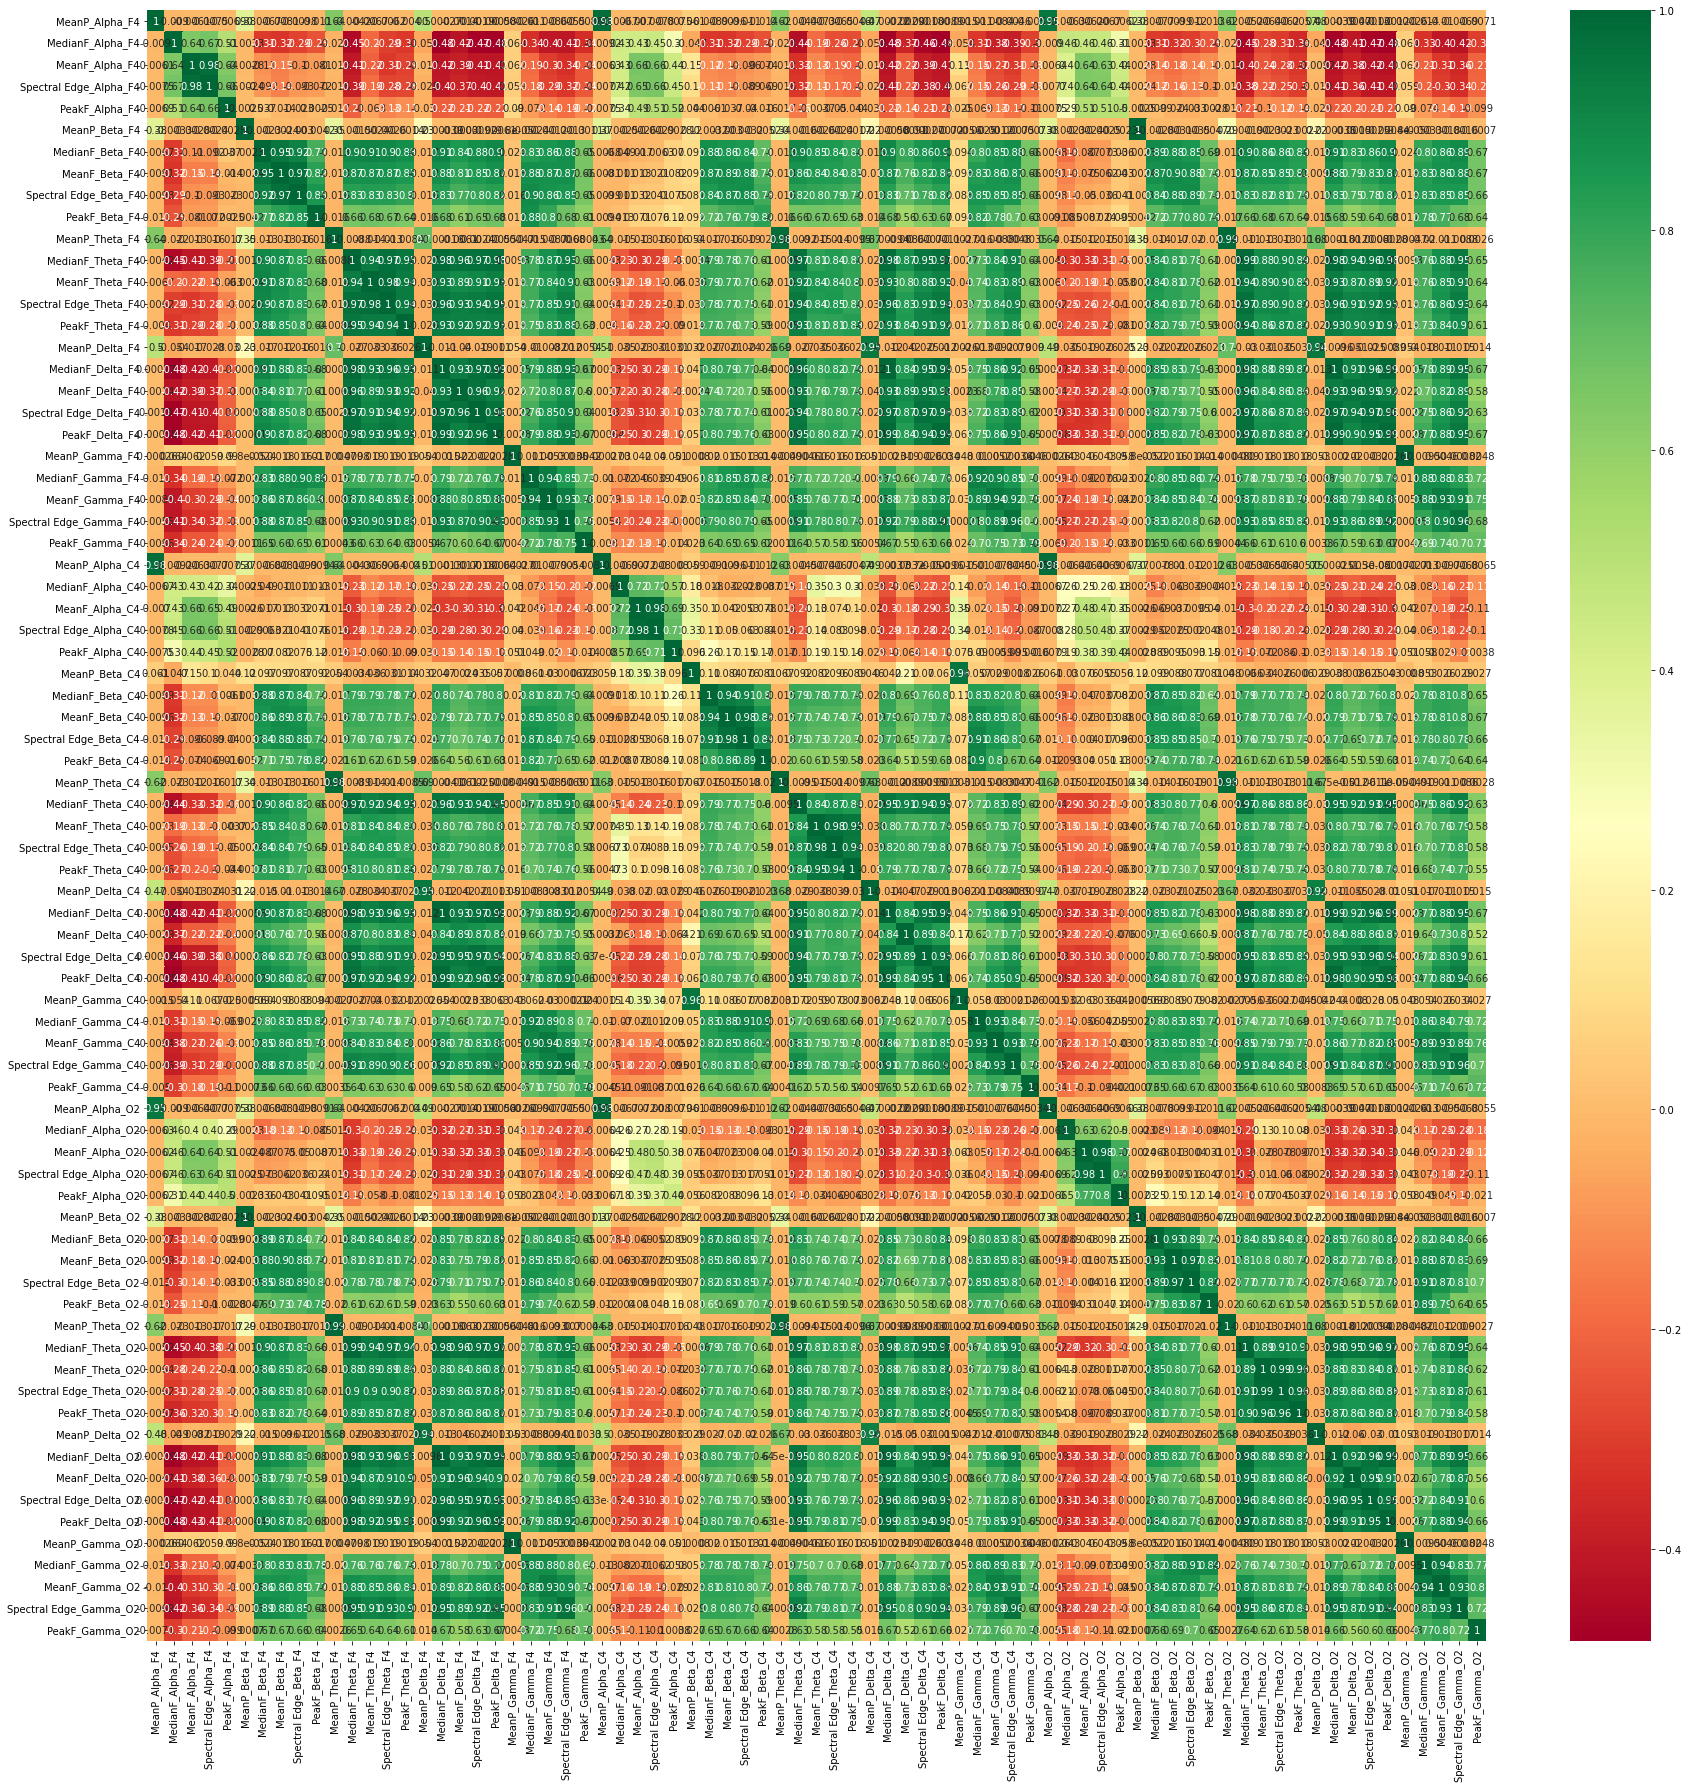

In [18]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")